## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

study_results.head()
mouse_metadata.head()

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata,study_results,on = "Mouse ID")
combined_data = combined_data.rename(columns={"Tumor Volume (mm3)": "Tumor Volume"})
combined_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#Set Mouse ID as Index
#combined_data = combined_data.set_index("Mouse ID")
#combined_data



## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_combined_data = combined_data.groupby(["Drug Regimen"])
drug_combined_data.count().head(10)


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [4]:
drug_vol_mean = drug_combined_data["Tumor Volume"].mean()
drug_vol_median = drug_combined_data["Tumor Volume"].median()
drug_vol_variance = drug_combined_data["Tumor Volume"].var()
drug_vol_std = drug_combined_data["Tumor Volume"].std()
drug_vol_sem = drug_combined_data["Tumor Volume"].sem()

drugVol_data_sumtable = pd.DataFrame({"Mean Tumor Vol": drug_vol_mean,
                                    "Median Tumor Volume": drug_vol_median,
                                    "Tumor Vol Variance": drug_vol_variance,
                                    "Tumor Vol Stdev": drug_vol_std,
                                    "Tumor Volume SEM": drug_vol_sem})
drugVol_data_sumtable



,Mean Tumor Vol,Median Tumor Volume,Tumor Vol Variance,Tumor Vol Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

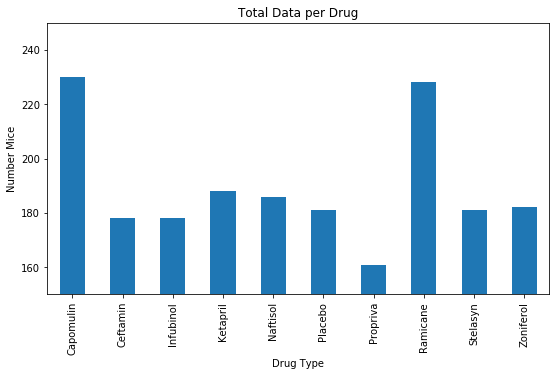

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
points = combined_data.groupby("Drug Regimen")
count = points["Drug Regimen"].count()
count_chart = count.plot(kind='bar',figsize = (9,5))
plt.ylim(150,250)
plt.title("Total Data per Drug")
plt.xlabel("Drug Type")
plt.ylabel("Number Mice")

plt.show()
plt.tight_layout()






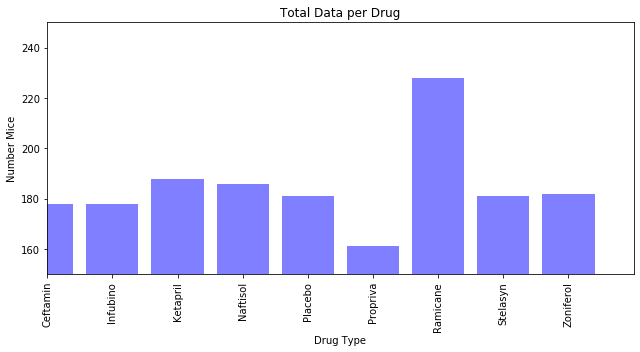

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = ("Capomulin","Ceftamin","Infubino","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol")
tick_locations = [value for value in x_axis]

plt.figure(figsize=(9,5))
plt.bar(x_axis,count,color = "blue", alpha = 0.5,align = "center")
plt.xticks(tick_locations, rotation = "90")

#plt.bar(x_axis,count, alpha = 0.5,align = "center")
#plt.xticks(tick_locations,count)
#plt.figure()

plt.xlim(1,len(x_axis))
plt.ylim(150,250)
plt.title("Total Data per Drug")
plt.xlabel("Drug Type")
plt.ylabel("Number Mice")

plt.tight_layout()
plt.show()


## Pie plots

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
total_sample = len(combined_data)
#print(total_sample)

genders = combined_data.groupby("Sex").count()
males = int(genders.iloc[1,1])
females = int(genders.iloc[0,1])

genders.head(10)







,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


(-1.2118576961571645,
 1.1385262726019687,
 -1.129486360001198,
 1.1331171949848262)

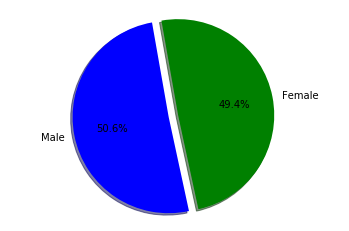

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ("Male", "Female")
totals = (males,females)
colors = ("blue", "green")
explode = (0.1,0)
plt.pie(totals,explode = explode,labels = sex, colors = colors,autopct="%1.1f%%",startangle = 100,shadow = "True")
plt.axis("equal")

## Quartiles, outliers and boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
most_promising = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
most_promising_df = combined_data.groupby(["Drug Regimen"])
drug_combined_data.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


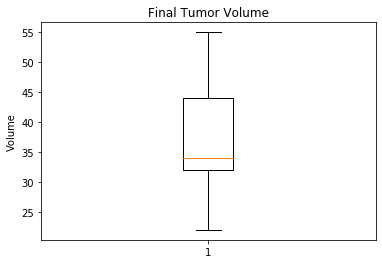

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_tumor_volume = [44,33,55,22,32,34,44,34,26]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Volume')
ax1.boxplot(final_tumor_volume)
plt.show()


## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = 

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen